In [27]:
import pandas as pd
import numpy as np

import re
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = list(stopwords.words('english'))

import spacy
nlp = spacy.load("en_core_web_sm", disable=["tagger","parser", "ner"])

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv("data/dev_data.csv")
data.head()

,text,label
0,i usually wear my hair in a twist out and when...,joy
1,i feel so irritated and rejected by it or is g...,anger
2,i can feel it disturbed within me,sadness
3,im talking about down right i feel like slappi...,anger
4,i almost feel like im messing with a precious ...,joy


## Clean and Pre-process data

In [16]:
# Clean text
def clean_text(text):

    # remove punctuation
    reg_punc =re.compile(r'[^\w\s]')
    text = reg_punc.sub(r'', text)

    # remove html
    reg_html = re.compile(r'<.*?>')
    text = reg_html.sub(r'', text)

    # remove url
    reg_url = re.compile(r'http\S+')
    text = reg_url.sub(r'', text)

    # remove numerical values
    reg_num = re.compile(r'[0-9]')
    text = reg_num.sub(r'', text)

    # remove special characters
    reg_spcl = re.compile('[@_!#$%^&*()<>?/\\|}{~:]')
    text = reg_spcl.sub(r'', text)

    # remove emoji
    emoji_url = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_url.sub(r'', text)

    return text

In [17]:
# data['process_text'] = data['text'].apply(lambda x: clean_text(x))
 
# count = 0
# for doc in nlp.pipe(data['process_text'].str.lower(), batch_size=32, n_process=3, disable=["tagger","parser", "ner"]):
#     data.loc[count, "process_text"] = " ".join([token.lemma_ for token in doc if token not in stop_words])
#     count += 1
data = pd.read_csv("data/lemmatized_dev_data.csv")

In [18]:
emotions = data['label'].unique().tolist()
emotions.sort()

emotions

['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']

In [19]:
# add the top 10 really common words to stopwords list
tmp_dict = WordCloud().process_text(" ".join(data['process_text']))
tmp_dict = sorted(tmp_dict.items(), key=lambda kv: kv[1])
tmp_dict.reverse()
tmp_dict = dict(tmp_dict)

stop_words.extend([key for key,value in tmp_dict.items()][:30])
stop_words.extend(['feel','think', 'like', 'would', 'really'])

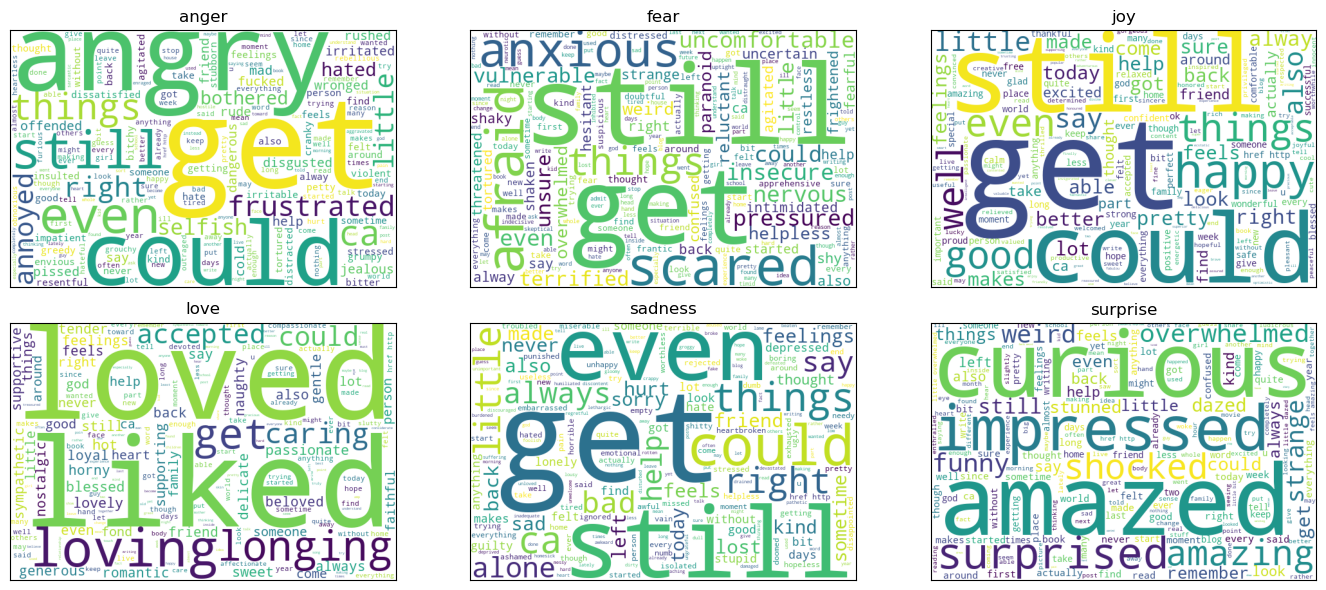

In [20]:
fig, axs = plt.subplots(figsize= (14,6), ncols = 3, nrows= 2)

wc_generator = WordCloud(width= 600, height= 400, background_color ='white', stopwords= stop_words)

i = j = 0

for ee in emotions:
    # create dictionary of frequencies of words
    tmp_data = data.query(f"label == '{ee}'")['process_text']
    # remove any words that have a frequency of more than 5000
    tmp_dict = wc_generator.process_text(" ".join(tmp_data))
    tmp_dict = {key:val for key, val in tmp_dict.items() if val < 5000 }
    
    wordcloud = wc_generator.generate_from_frequencies(tmp_dict)
    axs[i,j].imshow(wordcloud)
    axs[i,j].set_title(ee)
    axs[i,j].get_yaxis().set_visible(False)
    axs[i,j].get_xaxis().set_visible(False)

    # increment column number
    j += 1

    # if more than 1 column, increase the row number
    if j == 3:
        i += 1
        j = 0


plt.tight_layout();
# fig.savefig("images/wordclouds.png")